In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

from sklearn.model_selection import train_test_split


Using TensorFlow backend.


1. Load data
load the data from the file
each image is 28 x 28 = 784
training date set --> (42000 images, label size = 2 + image size = 784)
testing data set --> (28000 images, image_size = 784)


In [18]:
# Load the date set
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print('The dimension of training data is: {}'.format(train.shape))
print('The dimension of testing data is: {}'.format(test.shape))


The dimension of training data is: (42000, 785)
The dimension of testing data is: (28000, 784)


2. Separate data
separate the data as images and labels
delete the original variables to free some space

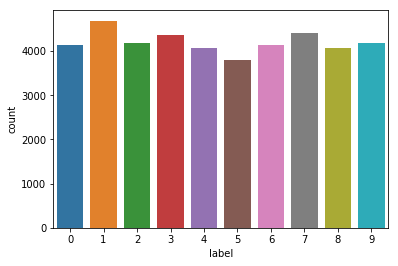

In [19]:
# Separate the label and image
train_label = train['label']
train_img = train.drop(columns='label')
test_img = test
del train
del test
axes = sns.countplot(train_label)  # visulize the training labels


3. Normalization
normalize the value of the images to \[0,1\]

In [20]:
# Normalization
train_img = train_img / 255.0
test_img = test_img / 255.0


4. Reshape
Reshape the data: 784 --> 28 x 28

In [21]:
# Reshape the data
train_img = train_img.values.reshape(-1,28,28,1)
test_img = test_img.values.reshape(-1,28,28,1)
print('The dimension of the training data after reshape is: {}'.format(train_img.shape))
print('The dimension of the testing data after reshape is: {}'.format(test_img.shape))


The dimension of the training data after reshape is: (42000, 28, 28, 1)
The dimension of the testing data after reshape is: (28000, 28, 28, 1)


5. Connvert to hot map
convert each label to a hot map
Example: if the label is 1 --> \[0. 1. 0. 0. 0. 0. 0. 0. 0\]

In [22]:
# Covert label to hot map
train_label = keras.utils.np_utils.to_categorical(train_label, num_classes=10)
print('One example of the hot map is:\nThe label --> {}\nconverting to --> {}'.
      format(np.nonzero(train_label[0])[0][0], train_label[0]))

One example of the hot map is:
The label --> 1
converting to --> [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


6. Train set and validate set
sepaeate the training data set into train set and validate set
use 15% of the image to form the validation set
\# of train images = 42000 x 0.85 = 35700
\# of validate images = 42000 x 0.15 = 6300

In [23]:
# Create the train set and validation set
train_img, vali_img, train_label, vali_label = train_test_split(train_img, train_label, 
                                                                test_size = 0.15, random_state=2)
print('The size of the train set is: {}'.format(train_img.shape[0]))
print('The size of the validate set is: {}'.format(vali_img.shape[0]))

The size of the train set is: 35700
The size of the validate set is: 6300


7. Some examples
show some samples images with their labels

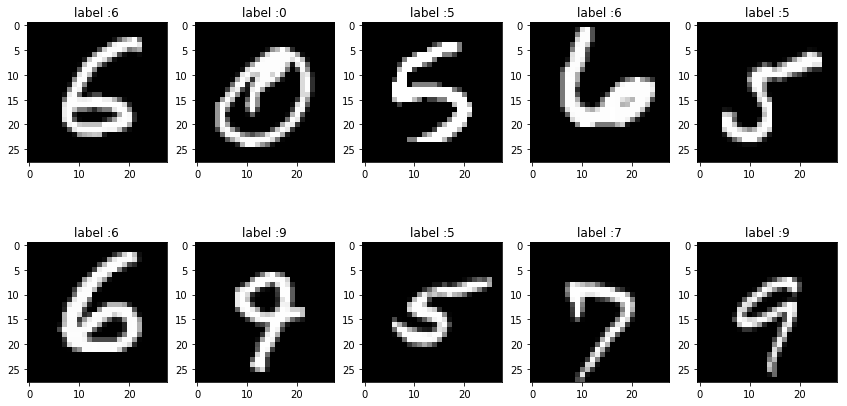

In [24]:
# Visualize one sample of the data
# Sample images from the train set
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_img[i][:,:,0], cmap='gray')
    plt.title("label :{}".format(np.nonzero(train_label[i])[0][0]))
# Sample images from the test set
for i in range(5):
    plt.subplot(2, 5, 5+i+1)
    plt.imshow(vali_img[i][:,:,0], cmap='gray')
    plt.title("label :{}".format(np.nonzero(vali_label[i])[0][0]))
plt.subplots_adjust(left = 0.125, right = 2, top = 1.5, bottom = 0.1)


8. Define the model
model --> \[Conv2D, MaxPool2D, Conv2D, Dropout, MaxPool2D, Conv2D, MaxPool2D, Conv2D, Dropout, MaxPool2D, Flatten, Dense, Dropout, Dense\]

In [28]:
# Define the model
model = keras.models.Sequential()  # create the model

model.add(keras.layers.Conv2D(filters = 6, kernel_size = (5,5),padding = 'Same', 
                             activation ='relu', input_shape = (28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                             activation ='relu',))
model.add(keras.layers.Dropout(rate=0.15))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(keras.layers.Dropout(rate=0.15))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation=tf.nn.relu))
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 16)        2416      
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 32)          4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 32)          0         
__________

9. Compile and train the model
lr --> learning rate
epsilon --> fuzzy factor (default)
decay -->  learning rate decay over each update (default)
loss --> loss function
metrics --> evaluate the accuracy when training

In [30]:
# Other parameters setting for the model
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_img, train_label, batch_size = 32, epochs = 20, 
                    validation_data = (vali_img, vali_label), verbose = 2)


Train on 35700 samples, validate on 6300 samples
Epoch 1/20
 - 24s - loss: 0.0906 - acc: 0.9727 - val_loss: 0.0928 - val_acc: 0.9706
Epoch 2/20
 - 24s - loss: 0.0724 - acc: 0.9788 - val_loss: 0.0628 - val_acc: 0.9817
Epoch 3/20
 - 24s - loss: 0.0611 - acc: 0.9822 - val_loss: 0.0575 - val_acc: 0.9840
Epoch 4/20
 - 23s - loss: 0.0548 - acc: 0.9835 - val_loss: 0.0470 - val_acc: 0.9849
Epoch 5/20
 - 23s - loss: 0.0501 - acc: 0.9850 - val_loss: 0.0516 - val_acc: 0.9849
Epoch 6/20
 - 24s - loss: 0.0485 - acc: 0.9863 - val_loss: 0.0535 - val_acc: 0.9841
Epoch 7/20
 - 23s - loss: 0.0409 - acc: 0.9875 - val_loss: 0.0452 - val_acc: 0.9867
Epoch 8/20
 - 23s - loss: 0.0395 - acc: 0.9878 - val_loss: 0.0519 - val_acc: 0.9860
Epoch 9/20
 - 23s - loss: 0.0400 - acc: 0.9884 - val_loss: 0.0378 - val_acc: 0.9876
Epoch 10/20
 - 23s - loss: 0.0363 - acc: 0.9894 - val_loss: 0.0422 - val_acc: 0.9883
Epoch 11/20
 - 24s - loss: 0.0337 - acc: 0.9894 - val_loss: 0.0480 - val_acc: 0.9865
Epoch 12/20
 - 23s - loss

10. Visualize the learning
visualize the learning curve(loss and accuracy)

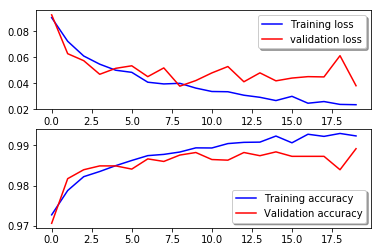

In [31]:
# Plot the learning curve
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], color='b', label="Training loss")
plt.plot(history.history['val_loss'], color='r', label="validation loss")
plt.legend(loc='best', shadow=True)

plt.subplot(2, 1, 2)
plt.plot(history.history['acc'], color='b', label="Training accuracy")
plt.plot(history.history['val_acc'], color='r',label="Validation accuracy")
plt.legend(loc='best', shadow=True)


11. Some top error
Show top 10 errors
'top' meaning the difference between the prob. of perdicte label and the prob. of true label is the biggest


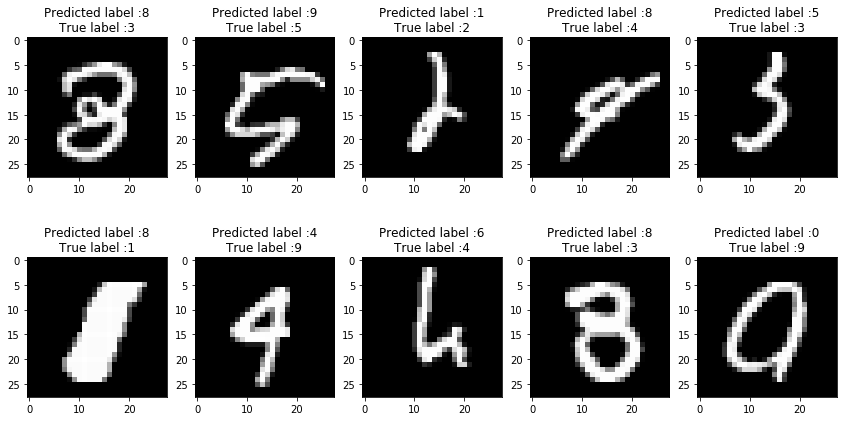

In [32]:
# Dsiplay some incorrectly classified images
pred_prob = model.predict(vali_img)  # prob. of different classes
pred_class = np.argmax(pred_prob,axis = 1)  # predicted classes
true_class = np.argmax(vali_label,axis = 1)  # actual classes

errors = (pred_class - true_class != 0)  # wrong prediction marked as 1

# Take out only the wrong predictions
pred_prob_wrong = pred_prob[errors] 
pred_class_wrong = pred_class[errors]
true_class_wrong = true_class[errors]
vali_img_wrong = vali_img[errors]

pred_prob_wrong_top = np.max(pred_prob_wrong, axis=1)  # top prob.
true_prob_wrong = np.diagonal(np.take(pred_prob_wrong, true_class_wrong, axis=1))  # prob. of its true label
delta = pred_prob_wrong_top - true_prob_wrong  # differences
delta_sort = np.argsort(delta)  # sort (increase)
top10 = delta_sort[-10:]  # take the top ten (maximum difference)

# plot the top ten
for i in range(10):
    plt.subplot(2, 5, i+1,)
    error = top10[i]
    plt.imshow(vali_img_wrong[error].reshape(28, 28), cmap='gray')
    plt.title("Predicted label :{}\nTrue label :{}".format(pred_class_wrong[error],true_class_wrong[error]))
plt.subplots_adjust(left = 0.125, right = 2, top = 1.5, bottom = 0.1)


12. Predict
perdict the label for testing data set

In [33]:
# Predict on testing data
pred = model.predict(test_img)
pred_label = np.argmax(pred,axis = 1) # choose the label with max prob. as predicted label


13. Submission
generate the .csv file for submission

In [36]:
# Generate the submission file
result = pd.Series(pred_label, name = "Label")
img_id = pd.Series(range(1,28001),name = "ImageId")
submission = pd.concat([img_id, result],axis = 1)
submission.to_csv("result.csv",index = False)
# show the first five line of the file
submission.head()


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
